In [174]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import cmath
from mpl_toolkits import mplot3d
import mpl_toolkits.mplot3d.art3d as art3d
import math
import warnings

warnings.filterwarnings("ignore") #ignoring of warnings


#**Z-Transform**

\begin{equation} x[n] = z^n
\end{equation}
\begin{equation} z = [0.95,1.05,-1.05,-0.97,1,-1]
\end{equation}

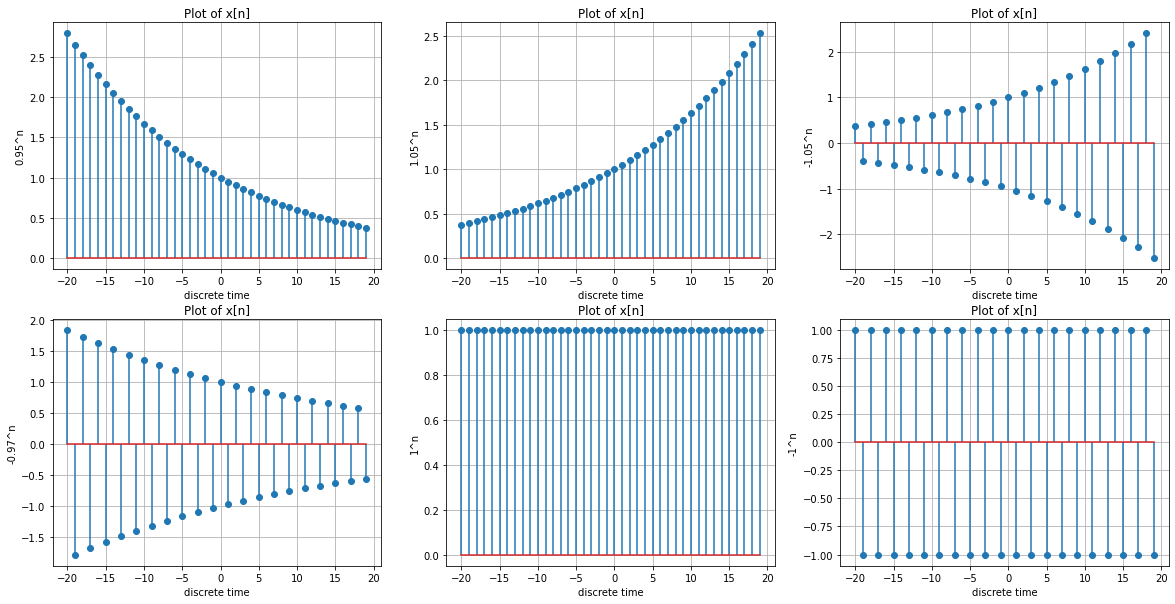

In [ ]:
z=[0.95,1.05,-1.05,-0.97,1,-1]
n=np.arange(-20,20, dtype=np.float)
plt.figure(1,figsize=(20,10))
k=1
for i in z:
  plt.subplot(2,3,k)
  y=pow(i,n)
  plt.stem(n,y,use_line_collection=True)
  plt.xlabel('discrete time')
  plt.ylabel(f'{i}^n')
  plt.title('Plot of x[n]')
  plt.grid(True)
  k+=1

\begin{equation} x[n] = z^n
\end{equation}
\begin{equation} z = [−2 + 3j, z = 2 − 3j, z = e^{jπ/10}, z = 0.95e^{jπ/10},z = 1.05e^{jπ/10}]
\end{equation}

###2d plot

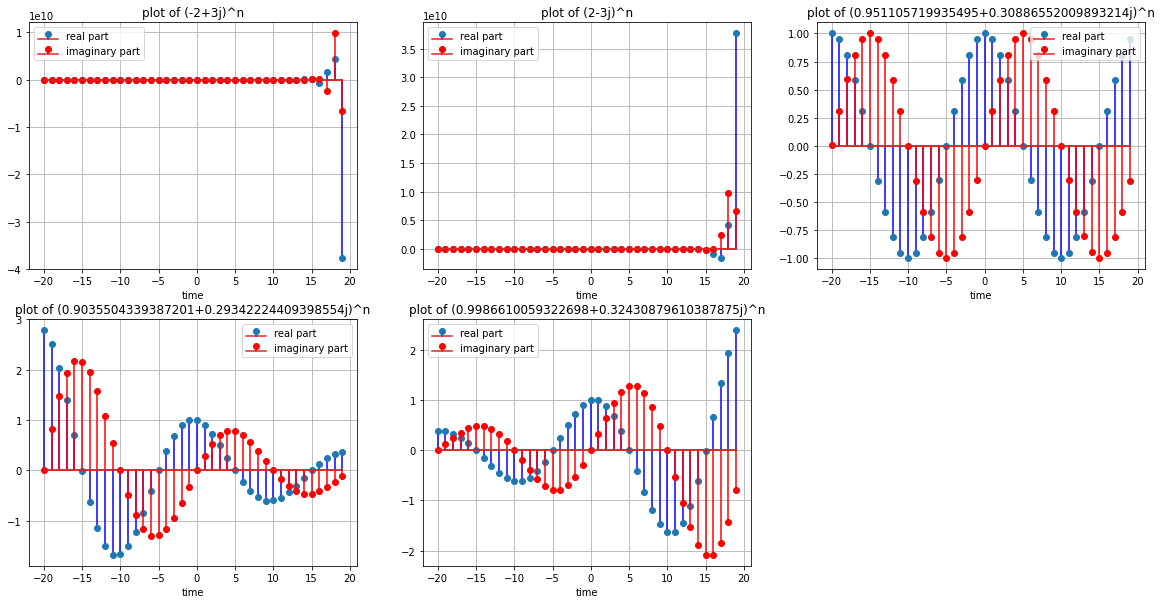

In [ ]:
z=[-2+3j,2-3j,np.e**(3.14j/10),0.95*np.e**(3.14j/10),1.05*np.e**(3.14j/10)]
n=np.arange(-20,20)
plt.figure(figsize=(20,10))
k=1

for i in z:
  plt.subplot(2,3,k)
  z=pow(i,n)
  x = np.real(z)
  y = np.imag(z)
  plt.stem(n,x,linefmt='blue')
  plt.stem(n,y,linefmt='red',markerfmt="ro")
  plt.legend(['real part','imaginary part'])
  plt.title(f'2D plot of {i}^n')
  plt.xlabel("time")
  plt.grid(True)
  k+=1

###3d plot

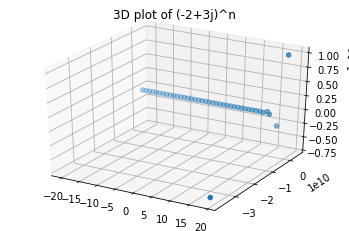

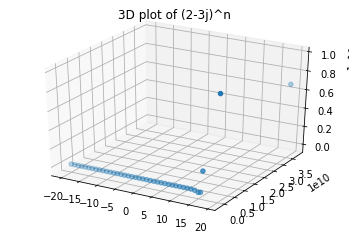

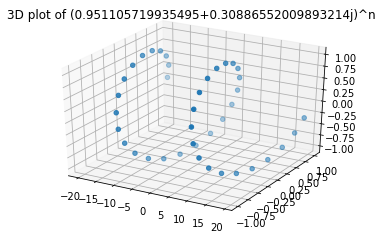

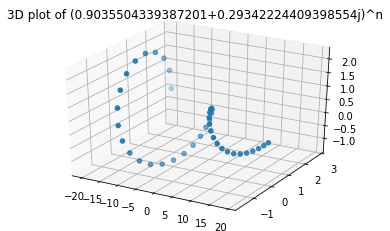

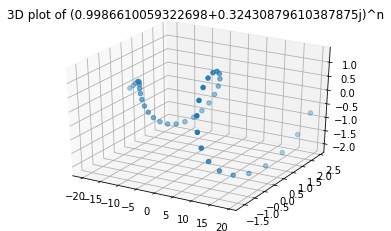

In [ ]:
n=np.arange(-20,20)
k=1

for i in z:
  plt.subplot(3,2,k)
  ax = plt.axes(projection ='3d')
  z=pow(i,n)
  x = np.real(z)
  y = np.imag(z)
  ax.scatter3D(n,x,y)
  ax.set_title(f"3D plot of {i}^n")
  plt.show()
  k+=1

The impulse response of $x[n]=z^n$ for the system $y[n] = 2x[n − 3]$ is $ H(z)= 2z^{-3}$  which is the eigen value...
* $H(z)=2r^{-3}e^{-3jw}$

* $phase=-3w$
* $mag=2r^{-3}$


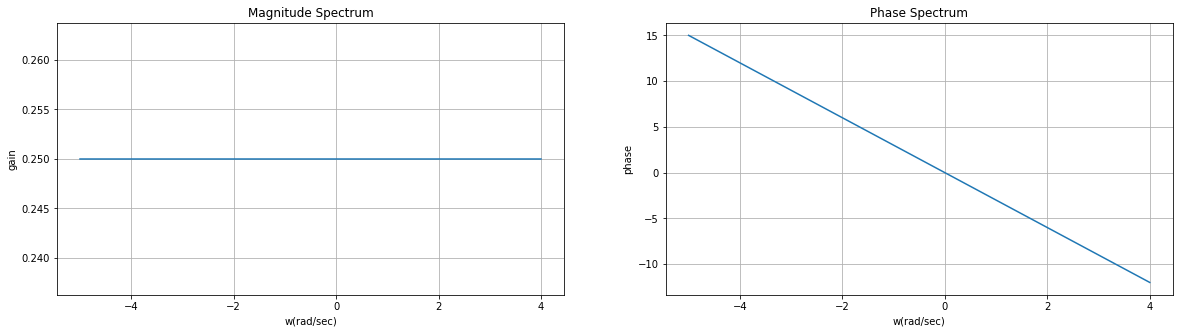

In [208]:
w = np.arange(-5,5)
#let r=2
mag =2*(2**(-3))*np.ones_like(w)
phase=-3*w

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.grid(True)
plt.title("Magnitude Spectrum")
plt.xlabel("w(rad/sec)")
plt.ylabel('gain')
plt.plot(w,mag)

plt.subplot(1,2,2)
plt.title("Phase Spectrum")
plt.xlabel("w(rad/sec)")
plt.ylabel("phase")
plt.plot(w,phase)
plt.grid(True)

##Z-Transforms

* $Z[δ[n]] = 1, ROC:z-plane$
* $Z[u[n]]= 1/(1-(z^{-1})), ROC:|z|>1$
* $Z[r[n]] = (z^{-1})/((1-z^{-1})^2), ROC: |z|>1$
* $Z[{a^n}u[n]] = 1/(1-(az^{-1})), ROC: |z|>|a|$
* $Z[n*(a^n)u[n]] = (az^{-1})/(1-az^{-1})^2, ROC: |z|>|a|$
* $Z[r^n*cos(ωn)u[n]] = (1 - r(z^{-1})cos(ω))/(1 - 2r(z^{-1})cos(ω) + r^2z^{-2}), ROC:|z|>|r|$


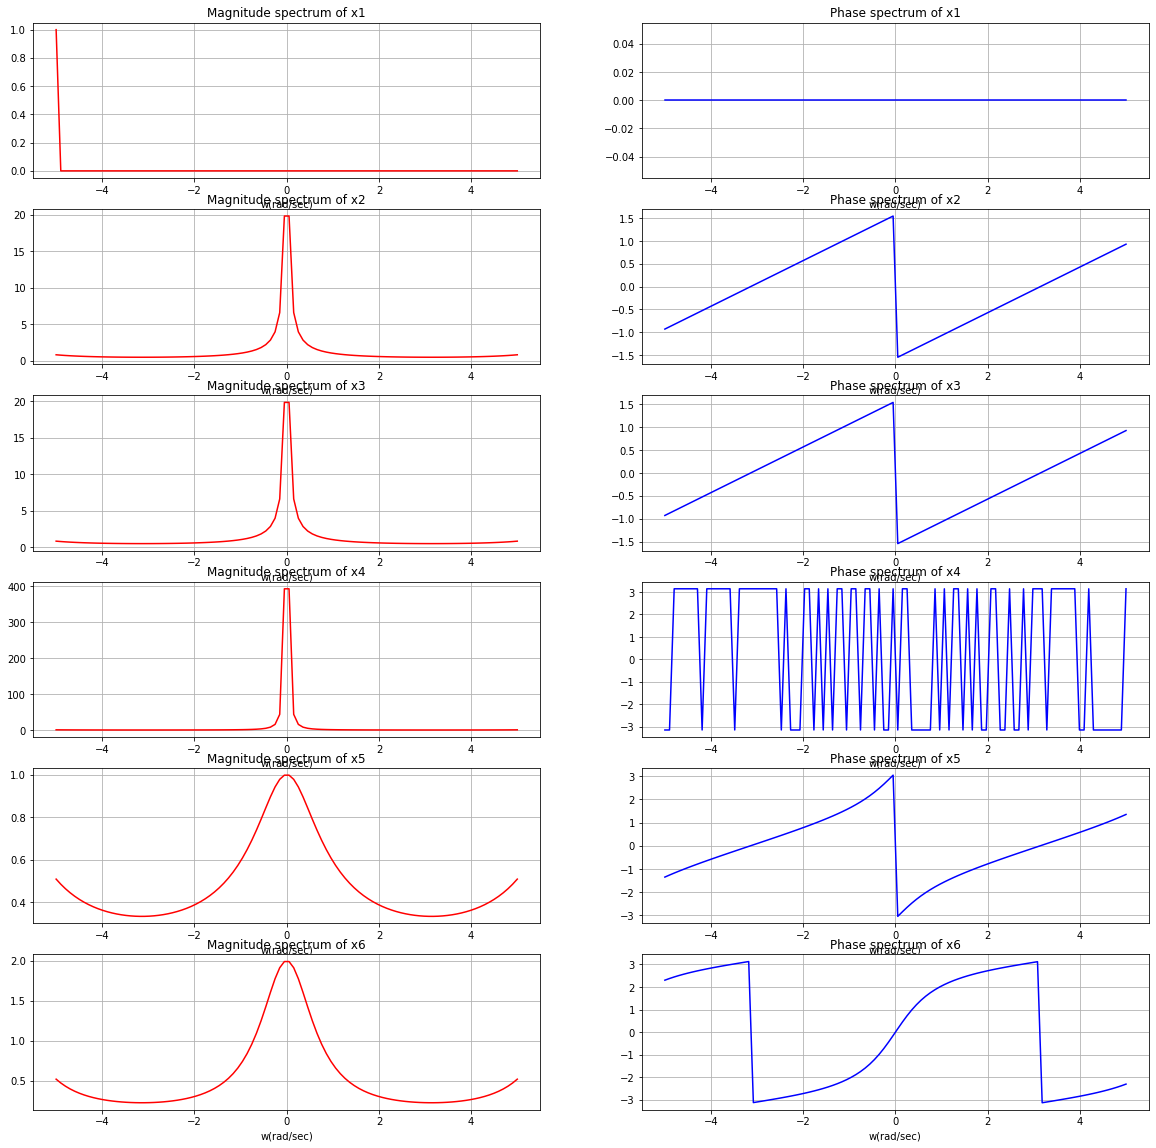

In [198]:
#r=1,alpha=2
x1  = np.zeros(100)
x1[0]=1
x2  = 1/(1-np.exp(-w*1j))
x3  = (np.exp(-w*1j))/(1-np.exp(-w*1j))**2
x4  = 1/(1-(2*np.exp(-w*1j)))
x5  = (2*np.exp(-w*1j))/(1-2*np.exp(-w*1j))**2
x6  =  (1 - 2*np.exp(-w*1j)*np.cos(10))/(1 - 2*2*(np.exp(-w*1j))*np.cos(10) + (2**2)*(np.exp(-w*2j)))#w=10,r=2
x=[x1,x2,x2,x3,x4,x5,x6]
w=np.linspace(-5,5,100)
k=1
plt.figure(figsize=(20,20))
for i in range(6):
  mag=np.zeros_like(w)
  phase=np.zeros_like(w)
  for j in range(100):
    m,p=cmath.polar(x[i][j])
    mag[j]=m
    phase[j]=p
  plt.subplot(6,2,k)
  plt.plot(w,mag, color ='red')
  plt.title(f'Magnitude spectrum of x{i+1}')
  plt.xlabel('w(rad/sec)')
  plt.grid(True)
  k+=1
  plt.subplot(6,2,k)
  plt.plot(w,phase, color ='blue')
  plt.title(f'Phase spectrum of x{i+1}')
  plt.xlabel('w(rad/sec)')
  plt.grid(True)
  k+=1

##Pole-zero plots

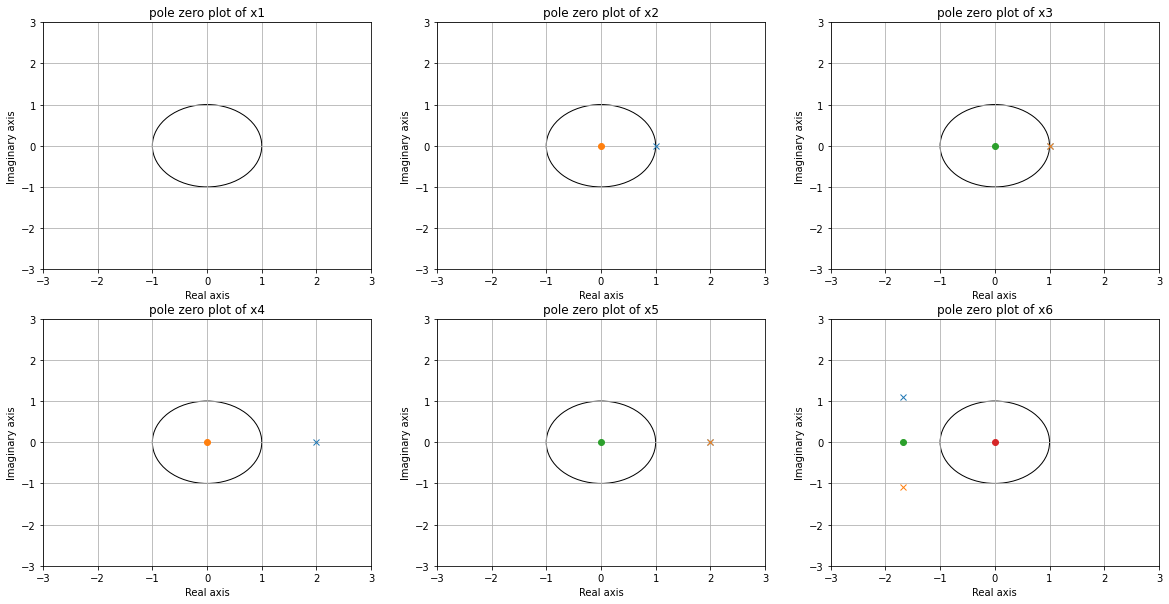

In [209]:
num = np.array([[1], [1,0], [1,0], [1,0], [2,0], [1,-2*np.cos(10),0]])
den = np.array([[1], [1,-1],[1,-2,1], [1,-2], [1,-4,4], [1,-4*np.cos(10),4]])
fig, ax = plt.subplots(2,3,figsize=(20,10))

for i in range(6):
  z,p,k=scipy.signal.tf2zpk(num[i],den[i])
  plt.subplot(2,3,i+1)
  for a in range(len(p)):
    plt.plot(p[a].real, p[a].imag,'x')
  for b in range(len(z)):
    plt.plot(z[b].real, z[b].imag,'o')
  plt.grid(True)
  plt.xticks([-3,-2,-1,0,1,2,3])
  plt.yticks([-3,-2,-1,0,1,2,3])
  circle=plt.Circle((0,0),1,fill=False)
  ax = fig.gca()
  ax.add_patch(circle)
  plt.title(f"pole zero plot of x{i+1}")
  plt.ylabel("Imaginary axis")
  plt.xlabel("Real axis")

#**Discrete-time fourier series**

Using property of DTFS:
* a[k] = a[N-k]
### for N=5 : a[1] = a*[4]
### a[3] = a*[2]

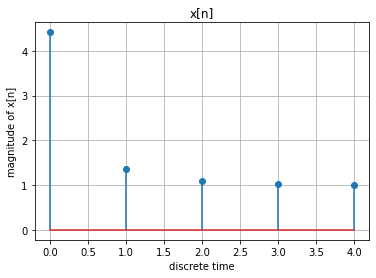

In [ ]:
x=np.zeros(5,dtype=complex)
a=np.zeros(5,dtype=complex)
a[0]=1
a[2]=np.exp(complex(0,np.pi/4))
a[4]=2*np.exp(1j*np.pi/3)
a[1]=np.conj(a[4])
a[3]=np.conj(a[2])
N=5

for n in range(N):
  for k in range(N):
    x[n]+=a[k]*np.exp(complex(0,1j*k*n*2*np.pi/5))

plt.stem(x,use_line_collection=True)
plt.xlabel('discrete time')
plt.ylabel("magnitude of x[n]")
plt.title('x[n]')
plt.grid(True)

##Periodic square wave

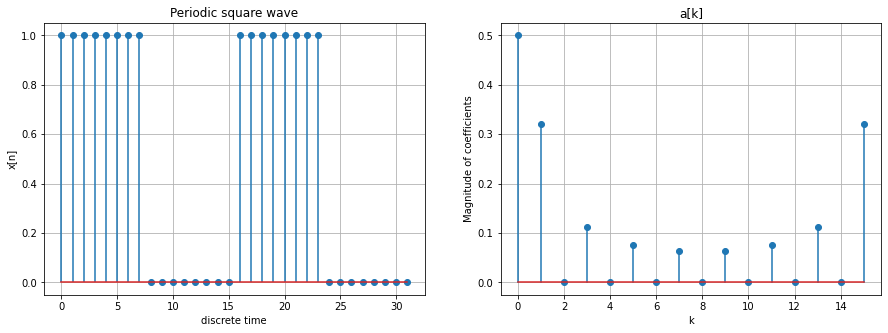

In [ ]:
#Periodic square wave with period 16
x=np.zeros(32,dtype=complex)

for i in range(32):
  if i%16<8:
    x[i]=1

plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
plt.xlabel("discrete time")
plt.ylabel("x[n]")
plt.title('Periodic square wave')
plt.stem(x,use_line_collection=True)
plt.grid(True)

#Coefficients of periodic square wave
a=np.zeros(16,dtype=complex)

for k in range(16):
  for n in range(16):
    a[k]+=(1/16)*x[n]*np.exp(-(1j*k*n*2*np.pi)/16)

plt.subplot(1,2,2)
plt.xlabel("k")
plt.ylabel("Magnitude of coefficients")
plt.title('a[k]')
plt.stem(abs(a))
plt.grid(True)

##Reconstruction of x[n]

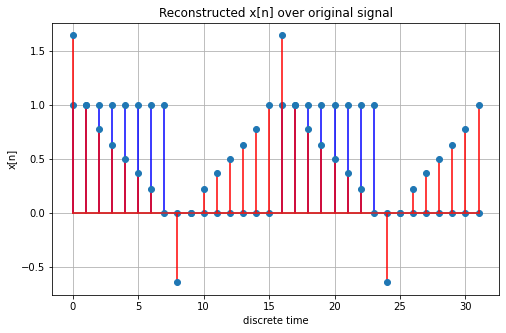

In [ ]:
#Reconstruction of periodic square wave
x_reconst=np.zeros(32,dtype=complex)

for n in range(32):
  for k in range(16):
    z=complex(0,(k*n*2*np.pi)/16)
    x_reconst[n]+=abs(a[k])*np.exp(z)

plt.figure(figsize=(8,5))
plt.stem(x,linefmt ='blue')
plt.stem(x_reconst,linefmt ='red')
plt.xlabel("discrete time")
plt.ylabel("x[n]")
plt.title('Reconstructed x[n] over original signal')
plt.grid(True)

#**Continuous Time Fourier Transform**

##Fourier transform of rectangular pulse 
* rect(t)=5 , |t|<=1:
* X(w) = 5*(2/w)*sin(w)

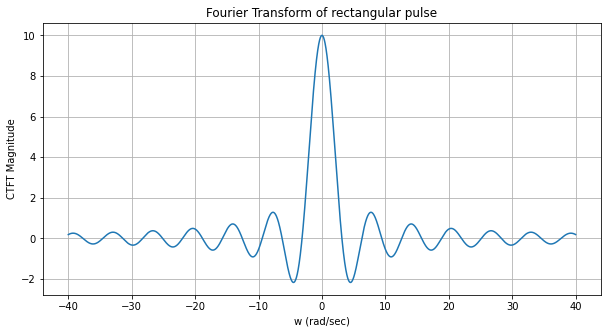

In [ ]:
w = np.arange(-40,40,0.01)
plt.figure(figsize=(10,5))
plt.grid()
plt.xlabel("w (rad/sec)")
plt.ylabel("CTFT Magnitude")
plt.title("Fourier Transform of rectangular pulse")
plt.plot(w,(10/w)*np.sin(w))

* Carrier signal\begin{equation} c(t) = cos{2\pi ft} \end{equation}

* Message signal\begin{equation} m(t) = 1-|t|,|t|<=1 \end{equation}



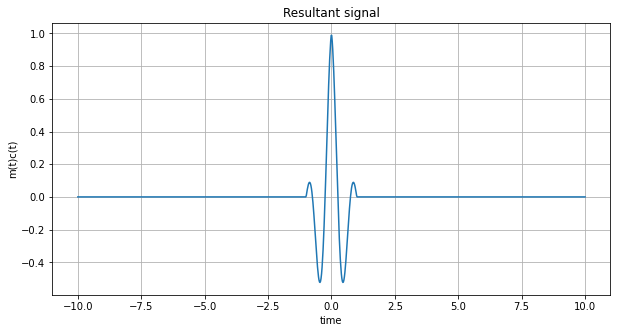

In [ ]:
#Carrier signal
def c(t):
  return np.cos(2*np.pi*1000*t)

#Message signal-Triangular pulse
def tri(t):
  return (1-abs(t))*(abs(t)<=1)


t=np.linspace(-10,10,1000)
y=c(t)*tri(t)
plt.figure(figsize=(10,5))
plt.plot(t,y)
plt.xlabel("time")
plt.ylabel("m(t)c(t)")
plt.title('Resultant signal')
plt.grid(True)

Fourier transform of triangular pulse=$((1/w)*sin(w))^2$

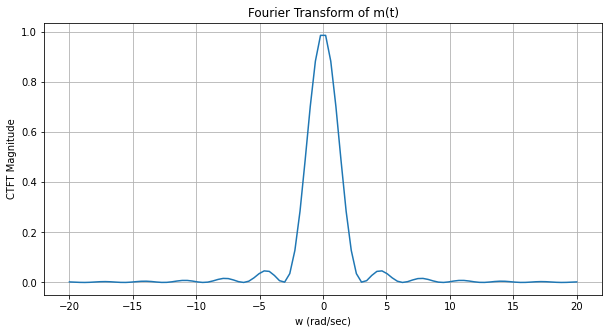

In [ ]:
w = np.linspace(-20,20,100)
plt.figure(1,figsize=(10,5))
plt.grid()
plt.xlabel("w (rad/sec)")
plt.ylabel("CTFT Magnitude")
plt.title("Fourier Transform of m(t)")
plt.plot(w,((1/w)*np.sin(w))**2)


Fourier transform of resultant signal

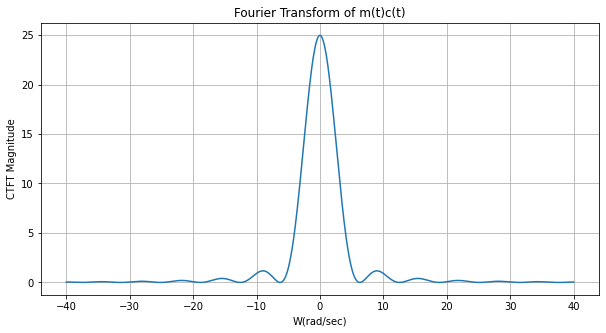

In [ ]:
W=np.linspace(-40,40,1000)
t=np.linspace(-20,20,1000)
y=np.zeros(1000,dtype=complex)

for i in range(1000):
  for j in range(1000):
    y[i]+=tri(t[j])*np.exp(complex(0,-W[i]*t[j]))

plt.figure(1,figsize=(10,5))
plt.plot(W,abs(y))
plt.xlabel('W(rad/sec)')
plt.ylabel('CTFT Magnitude')
plt.title('Fourier Transform of m(t)c(t)')
plt.grid(True)

#Triangular function in terms of rectangular pulse

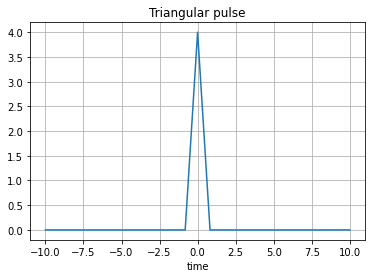

In [210]:
#rectangular pulse
def rect(t,T):
  return 1*(abs(t)<=T)

#convolution function
def convolution(x,h):
  M=len(x)
  N=len(h)
  y=np.zeros(M+N-1)
  for n in range(0,M+N-1):
    k=0
    while n-k>=0:
      if n-k<N and k<M:
        y[n]=y[n]+x[k]*h[n-k]
      k=k+1
  return y

#Convolution of two rectangular pulse results in triangular pulse of 2T width
t1=np.linspace(-5,5,50)
t2=np.linspace(-10,10,99)
plt.plot(t2,convolution(rect(t1,0.5),rect(t1,0.5)))

plt.title('Triangular pulse')
plt.xlabel('time')
plt.grid(True)

* For same rect functions,the convolution evaluates to triangular pulse of double width 
* Fourier transform of triangular pulse=(sinc function)**2

